# Guardian's Counted Data from 2015-16

Link: https://numeracy.co/projects/382368K6Bkx

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from IPython.core.display import HTML
css = open('/Users/georgemcintire/Data Science:Python/pycon-pandas-tutorial/style-table.css').read() + open('/Users/georgemcintire/Data Science:Python/pycon-pandas-tutorial/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [15]:
import seaborn as sns

In [16]:
import csv
import pickle
import collections

In [54]:
import requests
from bs4 import BeautifulSoup

In [17]:
! ls

COUNTED_README.txt
Counted_Data_Analysis.ipynb
WP_Fatal_Police_Shootings.csv
Washington Post Data Analysis.ipynb
ardpdqp.pdf
data-police-shootings
fatal_encounters_data.ipynb
fatal_encounters_form_responses.csv
mapping-violence.html
mapping_violence_13_15_Police Killings.csv
the-counted-2015.csv
the-counted-2016.csv


In [18]:
df = pd.read_csv("the-counted-2015.csv")

In [19]:
df.shape

(1140, 14)

In [20]:
df.columns

Index([u'uid', u'name', u'age', u'gender', u'raceethnicity', u'month', u'day',
       u'year', u'streetaddress', u'city', u'state', u'classification',
       u'lawenforcementagency', u'armed'],
      dtype='object')

In [21]:
df.day = df.day.apply(lambda x:str(x))

df.month = df.month.apply(lambda x:str(x))

df.year = df.year.apply(lambda x:str(x))

df["date"] = df["month"] + "-" + df["day"] + "-" + df["year"]

In [25]:
df.head()

,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,classification,lawenforcementagency,armed,date
0,2,Matthew Ajibade,22,Male,Black,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,Death in custody,Chatham County Sheriff's Office,No,January-1-2015
1,4,Lewis Lembke,47,Male,White,January,2,2015,4505 SW Masters Loop,Aloha,OR,Gunshot,Washington County Sheriff's Office,Firearm,January-2-2015
2,7,Tim Elliott,53,Male,Asian/Pacific Islander,January,2,2015,600 E Island Lake Dr,Shelton,WA,Gunshot,Mason County Sheriff's Office,Firearm,January-2-2015
3,5,Michael Kocher Jr,19,Male,White,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,Struck by vehicle,Kauai Police Department,No,January-3-2015
4,6,John Quintero,23,Male,Hispanic/Latino,January,3,2015,500 North Oliver Ave,Wichita,KS,Gunshot,Wichita Police Department,No,January-3-2015


In [31]:
df["date"] = pd.to_datetime(df.date)

In [34]:
del df["month"]

del df["day"]

del df["year"]

In [37]:
df.head()

,uid,name,age,gender,raceethnicity,streetaddress,city,state,classification,lawenforcementagency,armed,date
0,2,Matthew Ajibade,22,Male,Black,1050 Carl Griffin Dr,Savannah,GA,Death in custody,Chatham County Sheriff's Office,No,2015-01-01
1,4,Lewis Lembke,47,Male,White,4505 SW Masters Loop,Aloha,OR,Gunshot,Washington County Sheriff's Office,Firearm,2015-01-02
2,7,Tim Elliott,53,Male,Asian/Pacific Islander,600 E Island Lake Dr,Shelton,WA,Gunshot,Mason County Sheriff's Office,Firearm,2015-01-02
3,5,Michael Kocher Jr,19,Male,White,2600 Kaumualii Hwy,Kaumakani,HI,Struck by vehicle,Kauai Police Department,No,2015-01-03
4,6,John Quintero,23,Male,Hispanic/Latino,500 North Oliver Ave,Wichita,KS,Gunshot,Wichita Police Department,No,2015-01-03


In [38]:
df.tail()

,uid,name,age,gender,raceethnicity,streetaddress,city,state,classification,lawenforcementagency,armed,date
1135,1160,John Veach,39,Male,Unknown,1115 N Higley Blvd,Rawlins,WY,Gunshot,Rawlins Police Department,Unknown,2015-12-30
1136,1161,Eugene McSwain,25,Male,Black,10600 S Cottage Grove Ave,Chicago,IL,Gunshot,Chicago Police Department,Firearm,2015-07-10
1137,1162,Gilbert Heredia,38,Male,Hispanic/Latino,Montana Ave,Homedale,ID,Gunshot,Homedale Police Department,Firearm,2015-12-26
1138,1163,Raymone Davis,21,Male,Unknown,122 Shiloh St,Pittsburgh,PA,Gunshot,Pittsburgh Bureau of Police,Firearm,2015-12-04
1139,1164,Lionel Waters,35,Male,Black,600 Milford Harrington Hwy,Harrington,DE,Taser,Delaware State Police,Firearm,2015-12-20


Plotting histogram of states

In [43]:
plt.bar()

51

In [44]:
state_counts = df["state"].value_counts()

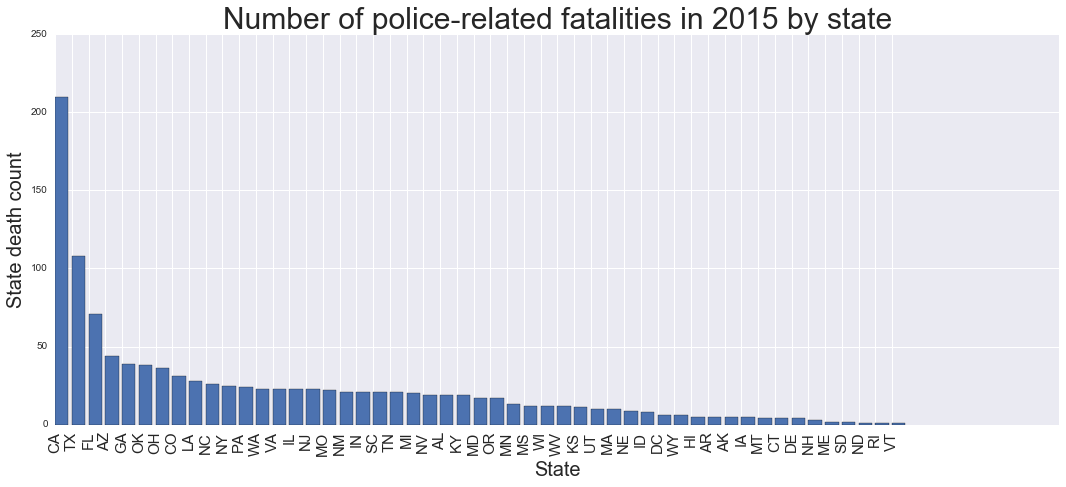

In [53]:
plt.figure(figsize=(18,7))
plt.bar(range(51), state_counts)
plt.xticks(range(51), state_counts.index, rotation="vertical", size= 15)
plt.xlabel("State", size=20)
plt.ylabel("State death count", size=20)
plt.title("Number of police-related fatalities in 2015 by state", size=30)
plt.show()

In [126]:
states = pd.read_csv("/Users/georgemcintire/Downloads/statetable.csv", names=["state", "pop"])

In [128]:
states = states.iloc[1:,:]

In [133]:
states["pop"] = states["pop"].map(lambda x:str(x).replace(",", ""))

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [138]:
states["pop"] = states["pop"].astype(float)

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [144]:
r = r.split("\n")

In [145]:
r = [i.split(",") for i in r]

In [152]:
states_dict = {}
for i in r:
    states_dict[i[0]] = i[1]

In [157]:
states["states_abr"] = states["state"].map(states_dict)

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [161]:
states.iloc[48, 2] = "DC"

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [164]:
sd = {}
for i, e in states.iterrows():
    sd[e.states_abr] = e.pop

In [175]:
st_dict = dict(zip(states["states_abr"], states["pop"]))

In [176]:
df["state_pop"] = df["state"].map(st_dict)

In [183]:
st_items = st_dict.items()

In [184]:
del st_items[0]

In [186]:
st_dict= dict(st_items)

In [188]:
type(state_counts)

pandas.core.series.Series

In [197]:
counts = pd.value_counts(df["state"]).to_dict()

In [200]:
df["state_count"] = df["state"].map(counts)

In [202]:
df["st_per_capita_per_100k"] = (df["state_count"]/df["state_pop"])*100000

In [207]:
df.head(30)

,uid,name,age,gender,raceethnicity,streetaddress,city,state,classification,lawenforcementagency,armed,date,state_pop,state_count,st_per_capita_per_100k
0,2,Matthew Ajibade,22,Male,Black,1050 Carl Griffin Dr,Savannah,GA,Death in custody,Chatham County Sheriff's Office,No,2015-01-01,10214860,39,0.381797
1,4,Lewis Lembke,47,Male,White,4505 SW Masters Loop,Aloha,OR,Gunshot,Washington County Sheriff's Office,Firearm,2015-01-02,4028977,17,0.421943
2,7,Tim Elliott,53,Male,Asian/Pacific Islander,600 E Island Lake Dr,Shelton,WA,Gunshot,Mason County Sheriff's Office,Firearm,2015-01-02,7170351,23,0.320765
3,5,Michael Kocher Jr,19,Male,White,2600 Kaumualii Hwy,Kaumakani,HI,Struck by vehicle,Kauai Police Department,No,2015-01-03,1431603,5,0.349259
4,6,John Quintero,23,Male,Hispanic/Latino,500 North Oliver Ave,Wichita,KS,Gunshot,Wichita Police Department,No,2015-01-03,2911641,11,0.377794
5,8,Matthew Hoffman,32,Male,White,630 Valencia St,San Francisco,CA,Gunshot,San Francisco Police Department,Non-lethal firearm,2015-01-04,39144818,210,0.536469
6,91,Kenneth Brown,18,Male,White,NaN,Guthrie,OK,Gunshot,Oklahoma State Police,Firearm,2015-01-04,3911338,38,0.971535
7,9,Kenneth Buck,22,Male,Hispanic/Latino,E Knox Rd and N Exeter St,Chandler,AZ,Gunshot,Chandler Police Department,Firearm,2015-01-05,6828065,44,0.644399
8,10,Michael Rodriguez,39,Male,Hispanic/Latino,818 31st St,Evans,CO,Gunshot,Evans Police Department,Other,2015-01-05,5456574,31,0.568122
9,1010,Frank Smart,39,Male,Black,950 Second Ave,Pittsburgh,PA,Death in custody,Allegheny County Bureau of Corrections,No,2015-01-05,12802503,24,0.187463


In [213]:
len(df.st_per_capita_per_100k.unique())

51

In [245]:
state_per_dict = dict(set(zip(df.state, df.st_per_capita_per_100k)))

In [253]:
state_np = np.asarray(sorted(state_per_dict.items(), key=lambda x:x[1], reverse=True))

In [256]:
state_np[:,0]

array(['WY', 'NM', 'OK', 'DC', 'AK', 'NV', 'WV', 'AZ', 'LA', 'CO', 'CA',
       'ID', 'NE', 'KY', 'SC', 'DE', 'OR', 'MS', 'TX', 'AL', 'MT', 'GA',
       'KS', 'MO', 'FL', 'HI', 'UT', 'WA', 'TN', 'IN', 'OH', 'MD', 'VA',
       'NC', 'NJ', 'MN', 'SD', 'NH', 'WI', 'MI', 'PA', 'IL', 'AR', 'IA',
       'VT', 'ME', 'MA', 'ND', 'NY', 'CT', 'RI'], 
      dtype='|S15')

In [320]:
np.savetxt("state_per_capita_rate.csv", state_np)

TypeError: Mismatch between array dtype ('|S15') and format specifier ('%.18e %.18e')

In [322]:
state_np.tofile('state_np.csv',sep=',')

In [296]:
?plt.bar

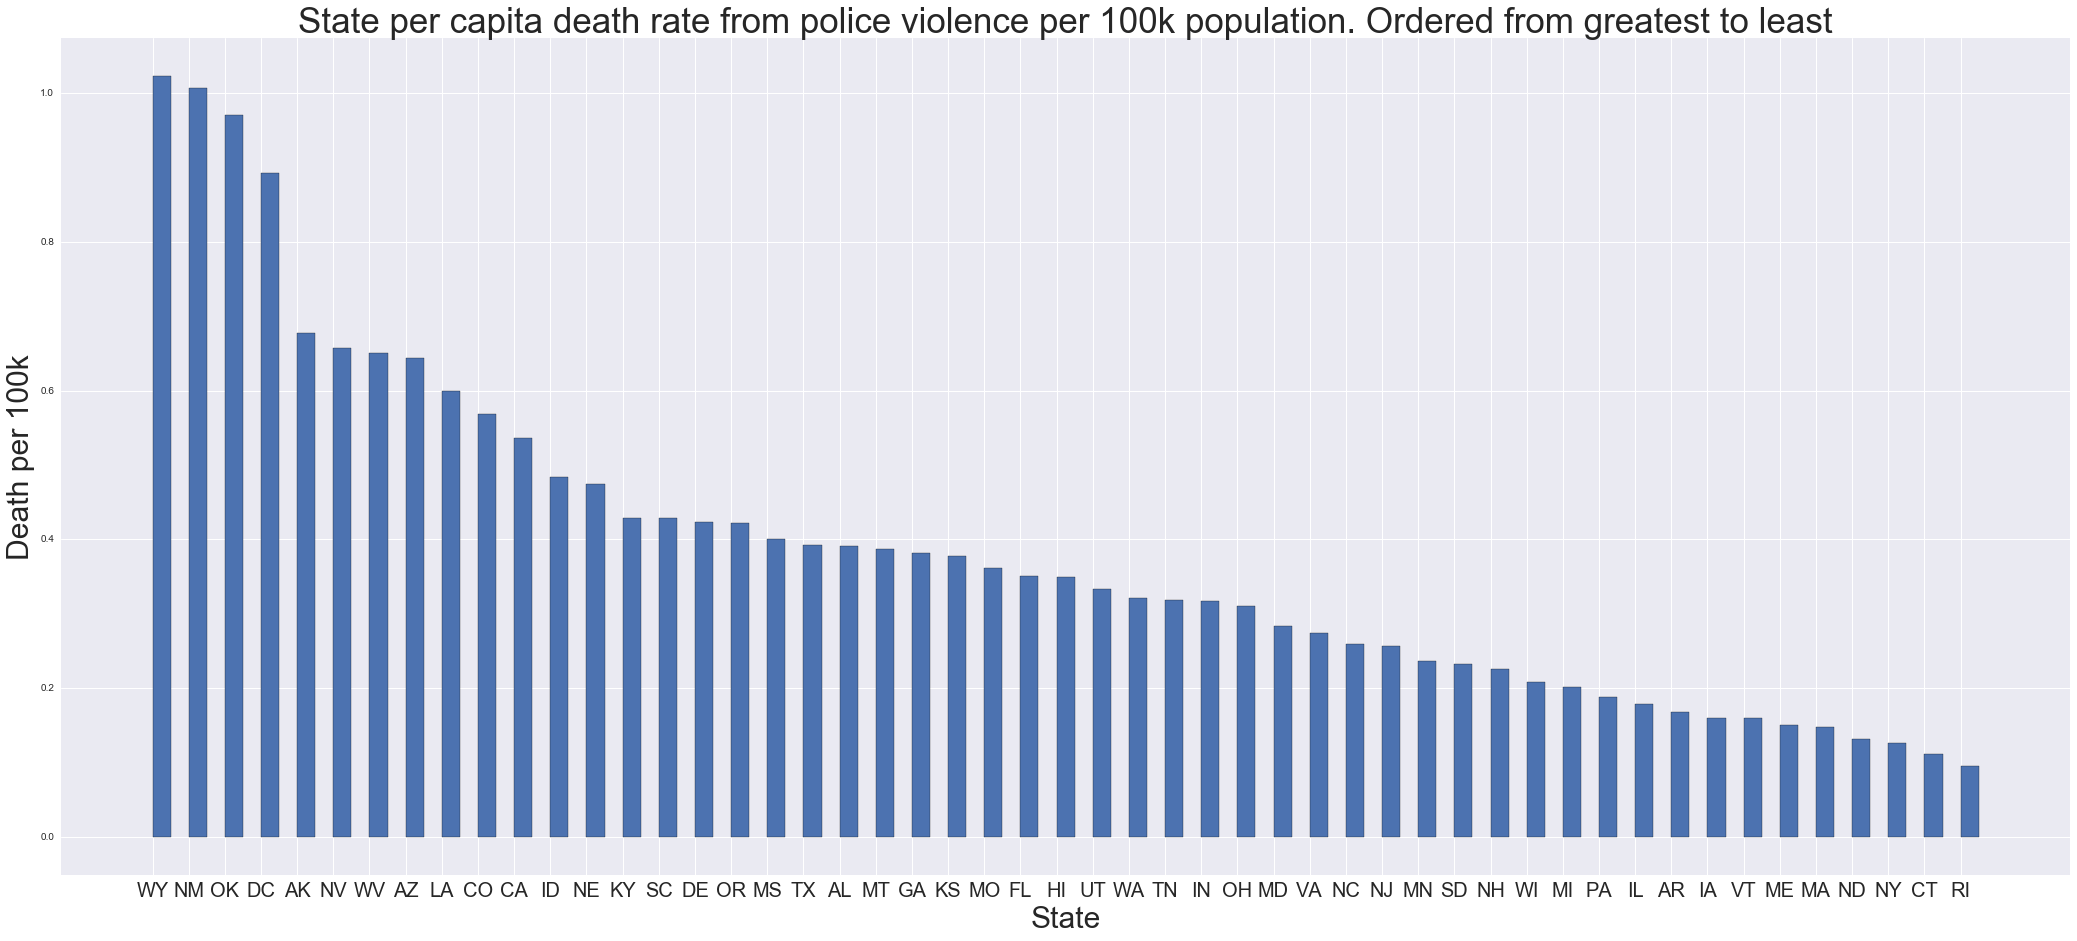

In [307]:
plt.figure(figsize=(36, 15))
plt.bar(range(51),state_np[:,1], width =bar_width, tick_label=state_np[:,0])
plt.xticks(range(51), state_np[:,0], size= 20)

plt.xlabel("State", size=30)
plt.ylabel("Death per 100k", size=30)
plt.title("State per capita death rate from police violence per 100k population. Ordered from greatest to least", size=35)
plt.margins(0.05)
plt.show()



In [231]:
per_cap_dict = dict(zip(df.state.unique(),df.st_per_capita_per_100k))

In [242]:
sorted(per_cap_dict.items(), key=lambda x:x[1], reverse=True)

[('NH', 1.0071415930773884),
 ('RI', 0.97153454904689895),
 ('OK', 0.97153454904689895),
 ('MA', 0.65724727545060357),
 ('AL', 0.64439925513304275),
 ('AZ', 0.64439925513304275),
 ('DE', 0.59947879600678611),
 ('MN', 0.59947879600678611),
 ('WY', 0.56812204874340566),
 ('CO', 0.56812204874340566),
 ('WI', 0.53646947598530148),
 ('IL', 0.53646947598530148),
 ('IA', 0.53646947598530148),
 ('CA', 0.53646947598530148),
 ('CT', 0.53646947598530148),
 ('KY', 0.53646947598530148),
 ('MT', 0.47463598057156725),
 ('ND', 0.42936960406698887),
 ('OR', 0.42194333698107483),
 ('FL', 0.39316885138705238),
 ('TN', 0.39316885138705238),
 ('NV', 0.39316885138705238),
 ('VT', 0.39316885138705238),
 ('IN', 0.39316885138705238),
 ('MO', 0.38724080278890832),
 ('GA', 0.38179671576507168),
 ('OH', 0.37779382829133124),
 ('KS', 0.37779382829133124),
 ('MD', 0.36162370357902268),
 ('HI', 0.34925883782026163),
 ('NJ', 0.33378739545361541),
 ('NC', 0.33378739545361541),
 ('NY', 0.33378739545361541),
 ('WA', 0.3

In [308]:
df.shape

(1140, 15)

In [311]:
df.rename(columns={"raceethnicity":"race"}, inplace=True)

In [313]:
race_count = df["race"].value_counts()

In [314]:
race_count

White                     578
Black                     303
Hispanic/Latino           194
Asian/Pacific Islander     24
Unknown                    23
Native American            13
Arab-American               4
Other                       1
Name: race, dtype: int64

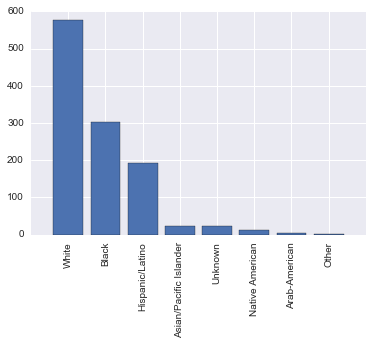

In [317]:
plt.bar(range(len(race_count)), race_count, align="center")
plt.xticks(range(len(race_count)), race_count.index, rotation="vertical")
plt.show()

In [323]:
import pickle

with open('state_np.pkl', 'w') as picklefile:
    pickle.dump(state_np, picklefile)

In [324]:
df.columns

Index([u'uid', u'name', u'age', u'gender', u'race', u'streetaddress', u'city',
       u'state', u'classification', u'lawenforcementagency', u'armed', u'date',
       u'state_pop', u'state_count', u'st_per_capita_per_100k'],
      dtype='object')